<a href="https://colab.research.google.com/github/Rahullnitp/Alphabet_Inc_Stock_Market_Prediction/blob/master/Alphabet_Inc_Stock_Market_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Aim

Stock market prediction of  Alphabet Inc. .



*  In this project , i will analyse and perform predictive analytics on the historic data of Alphabet Inc. and perform  a classification or regression task to predict future price or return. 

*   Alphabet Inc. is an American multinational conglomerate headquartered in Mountain View, California. It was created through a corporate restructuring of Google, and became the parent company of Google and several former Google subsidiaries.  

#Data Collection :
     

*   Alpha vantage APIs is used for Data Collection of "Alphabet Inc." 

In [2]:
pip install alpha_vantage   #Python module to get stock data from the Alpha Vantage Api

  Created wheel for alpha-vantage: filename=alpha_vantage-2.1.2-cp36-none-any.whl size=14690 sha256=dd31ea8685e61b31e715f3d02d9b55ad5416445107bc895bc5795b93f48a6ec6
  Stored in directory: /root/.cache/pip/wheels/bb/22/da/426cbebbe36cf3c0fd433d279f670cadfa27cc3343303cdf36
Successfully built alpha-vantage


 Extract data in 'data' and information of data in 'meta_data' variables respectively.


  





In [0]:
from alpha_vantage.timeseries import TimeSeries
ts = TimeSeries(key='1Z4BA7A9NKB32IJL',output_format='pandas')
data, meta_data = ts.get_daily('GOOGL', outputsize='full') #by using symbol as "GOOGL" ,we can extract the data of 'Alphabet Inc.' .

Overview of data
*  This API returns daily time series (date, daily open, daily high, daily low, daily close, daily volume, daily adjusted close, and split/dividend events) of the global equity specified, covering 20+ years of historical data as shown below in meta_data.

In [101]:
meta_data

{'1. Information': 'Daily Prices (open, high, low, close) and Volumes',
 '2. Symbol': 'GOOGL',
 '3. Last Refreshed': '2019-12-09',
 '4. Output Size': 'Full size',
 '5. Time Zone': 'US/Eastern'}

#Data_preprocessing:

in this section, i will perform Data mining technique that involves transforming raw data into an understandable format and Data Cleaning .


In [0]:
# import libraries

import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
%matplotlib inline
import warnings

In [103]:
data.head()

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2019-12-09,1338.86,1357.55,1336.07,1342.99,1417560.0
2019-12-06,1332.75,1342.47,1331.23,1339.39,1648729.0
2019-12-05,1327.00,1327.98,1314.32,1326.96,1220631.0
2019-12-04,1306.10,1324.27,1303.05,1318.94,1776392.0
2019-12-03,1278.66,1297.23,1277.05,1294.74,1480026.0


In [104]:
data.shape

(3854, 5)

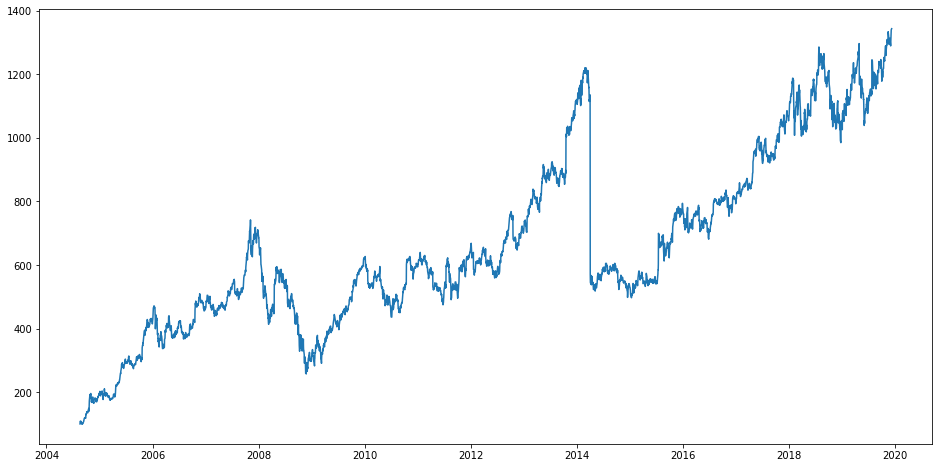

In [105]:
#Let’s plot the 'close' variable to understand how it’s shaping up in our data: 

plt.figure(figsize=(16,8))
plt.plot(data['4. close'], label='Close Price history')

In [0]:
#Change the data format ,so that it will be easy to understand and readable.

data.columns=['open','high','low','close','volume']
data=data.reset_index()

In [107]:
data.head().transpose()

,0,1,2,3,4
date,2019-12-09 00:00:00,2019-12-06 00:00:00,2019-12-05 00:00:00,2019-12-04 00:00:00,2019-12-03 00:00:00
open,1338.86,1332.75,1327,1306.1,1278.66
high,1357.55,1342.47,1327.98,1324.27,1297.23
low,1336.07,1331.23,1314.32,1303.05,1277.05
close,1342.99,1339.39,1326.96,1318.94,1294.74
volume,1.41756e+06,1.64873e+06,1.22063e+06,1.77639e+06,1.48003e+06


In [108]:
data.describe()   # for statistical details like percentile, mean, std and quantiles of data.

,open,high,low,close,volume
count,3854.000000,3854.000000,3854.000000,3854.000000,3.854000e+03
mean,658.934278,665.016121,652.374620,658.780847,7.139593e+06
std,278.201937,279.864676,276.486559,278.313539,8.011565e+06
min,99.090000,101.740000,95.960000,100.010000,3.845900e+04
25%,475.097500,480.005000,470.300000,474.467500,1.928612e+06
50%,588.150000,592.200000,582.815000,587.115000,4.430048e+06
75%,828.792500,831.590000,823.203775,828.030000,9.152900e+06
max,1338.860000,1357.550000,1336.070000,1342.990000,8.215110e+07


In [109]:
data.info()        #Information about a DataFrame including the index dtype and column dtypes, non-null values and memory usage.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3854 entries, 0 to 3853
Data columns (total 6 columns):
date      3854 non-null datetime64[ns]
open      3854 non-null float64
high      3854 non-null float64
low       3854 non-null float64
close     3854 non-null float64
volume    3854 non-null float64
dtypes: datetime64[ns](1), float64(5)
memory usage: 180.8 KB




*   'date' is of datetime type while all others are float




In [110]:
data.isnull().sum() # number of null values in each column.

date      0
open      0
high      0
low       0
close     0
volume    0
dtype: int64

#Models

##i).Moving Average



*   The predicted closing price for each day will be the average of a set of previously observed values. 

*   for each subsequent step, the predicted values are taken into consideration while removing the oldest observed value from the set.



In [0]:
#arrange the data in ascending order
data=data.sort_values('date',ascending=True).reset_index().drop('index',axis=1)

In [112]:
data.head()

,date,open,high,low,close,volume
0,2004-08-19,100.01,104.06,95.96,100.335,44659000.0
1,2004-08-20,101.01,109.08,100.50,108.310,22834300.0
2,2004-08-23,110.76,113.48,109.05,109.400,18256100.0
3,2004-08-24,111.24,111.60,103.57,104.870,15247300.0
4,2004-08-25,104.76,108.00,103.88,106.000,9188600.0


In [0]:
#splitting in train and test set.

y_label=data['close']                # store target i.e. data['close'] in 'y_label' variable as it is the value that we have to predict.
data=data.drop('close',axis=1)       #drop data['close'] as we have already stored it in 'y_label'.
x_train,x_valid,y_train,y_valid=train_test_split(data,y_label,test_size=.3,random_state=42)     # Split the data in two parts i.e. train and validation part.

In [114]:
x_train.shape         #shape of training set.

(2697, 5)

In [115]:
x_valid.shape[0]           #shape of validation set.

1157

In [0]:
#Making the prediction
predictions = []
for i in range(0,x_valid.shape[0]):
    a = y_train[len(x_train)-x_valid.shape[0]+i:].sum() + sum(predictions)
    b = a/(x_valid.shape[0])
    predictions.append(b)

In [117]:
#Checking the result(RMSE values)

ms=mean_squared_error(np.array(y_valid), predictions)      
rms=np.sqrt(ms)
rms                                       # Mathematically: rms=np.sqrt(np.mean(np.power((np.array(y_valid)-predictions),2)))

283.55834633570163